In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [33]:
df=pd.read_csv(r"C:\Users\tiwar\OneDrive\Desktop\Pandas Datasets\spam_ham_dataset.csv",encoding='latin-1')

In [34]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [39]:
df.drop(columns=['Unnamed: 0'],inplace=True)

# Label Distribution

<Axes: xlabel='label', ylabel='count'>

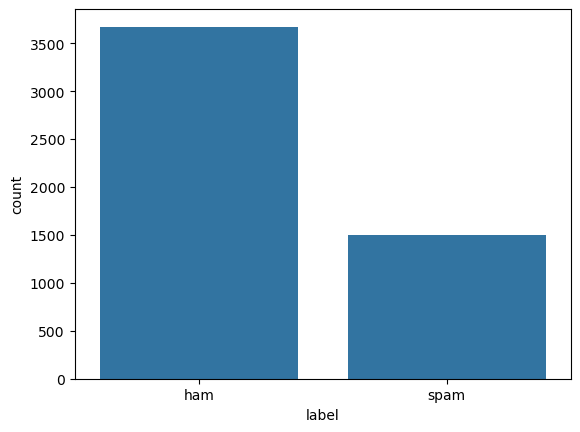

In [40]:
sns.countplot(x='label',data=df)

# 2.2 Message Length

In [41]:
df['Length']=df.text.apply(len)

Text(0.5, 1.0, 'Message Length Distribution')

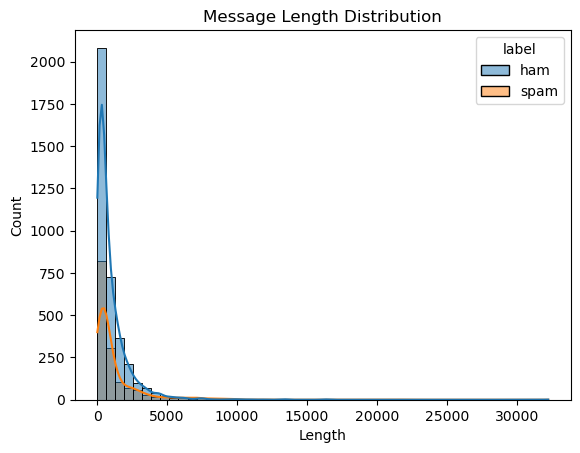

In [42]:
sns.histplot(data=df,x='Length',hue='label',bins=50,kde=True)
plt.title('Message Length Distribution')

# WordCloud

In [50]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def clean_text(text):
    text=text.lower()
    text=text=re.sub(r'\W',' ',text)
    text=text=re.sub(r'\s+',' ',text)
    text=text=re.sub(r'\d+',' ',text)
    text=''.join([ch for ch in text if ch not in string.punctuation])
    return text
df['cleaned']=df.text.apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tiwar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
df

,label,text,label_num,Length,cleaned
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,subject enron methanol meter this is a follo...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,subject hpl nom for january see attached f...
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,subject neon retreat ho ho ho we re around to ...
3,spam,"Subject: photoshop , windows , office . cheap ...",1,414,subject photoshop windows office cheap main tr...
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,subject re indian springs this deal is to book...
...,...,...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0,534,subject put the on the ft the transport volu...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1114,subject and following noms hpl can t tak...
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,402,subject calpine daily gas nomination julie as ...
5169,ham,Subject: industrial worksheets for august 2000...,0,573,subject industrial worksheets for august act...


# Feature Extraction

In [85]:
vectorizer=TfidfVectorizer(stop_words='english')
X=vectorizer.fit_transform(df['cleaned'])
y=df['label'].map({'ham':0,'spam':1})

# Train test split

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Model Training with SVM

In [73]:
model=SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

# Evaluation

In [76]:
y_pred=model.predict(X_test)

In [78]:
print('Accuracy score: ',accuracy_score(y_test,y_pred))

Accuracy score:  0.9903381642512077


In [82]:
print('Confusion Metrix  \n',confusion_matrix(y_test,y_pred))

Confusion Metrix  
 [[735   7]
 [  3 290]]


In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       742
           1       0.98      0.99      0.98       293

    accuracy                           0.99      1035
   macro avg       0.99      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035

